In [52]:
import numpy as np
import pandas as pd

# reading CSV file 
df_china = pd.read_csv(r'C:\Users\Administrator\Documents\Machine Learning\Files_CSV\china_gdp.csv')
df_china.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


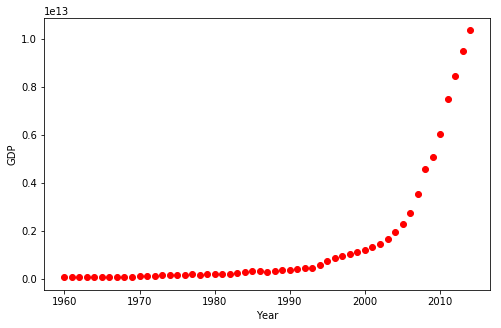

In [53]:
# Plotting the Dataset
plt.figure(figsize = (8,5))
x_data, y_data = (df_china['Year'].values, df_china['Value'].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

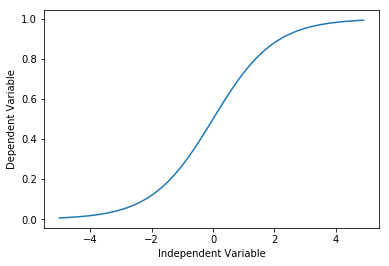

In [54]:
# Choosing a logistic function

x = np.arange(-5.0, 5.0, 0.1)
y = 1.0 / (1.0 + np.exp(-x))

plt.plot(x,y)
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

In [55]:
# Building regression model and initialize its parameters.
def sigmoid(x, Beta_1, Beta_2):
    y = 1 / (1 + np.exp(-Beta_1 * (x - Beta_2)))
    return y

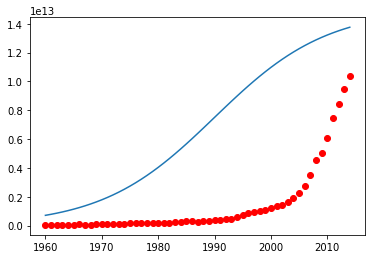

In [56]:
#a sample sigmoid line that might fit with the data:
beta_1 = 0.10
beta_2 = 1990.0

# Logistic function
Y_hat = sigmoid(x_data, beta_1, beta_2)

# plot initial prediction against datapoints
plt.plot(x_data, Y_hat * 15000000000000.)
plt.plot(x_data, y_data, 'ro')

In [57]:
# normalize x and y:
xdata = x_data/max(x_data)
ydata = y_data/max(y_data)

In [58]:
#use curve_fit which uses non-linear least squares to fit  sigmoid function, to data.
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)

# print the final parameters
print('beta_1 = %f, beta_2 = %f' % (popt[0], popt[1]))

beta_1 = 690.451711, beta_2 = 0.997207


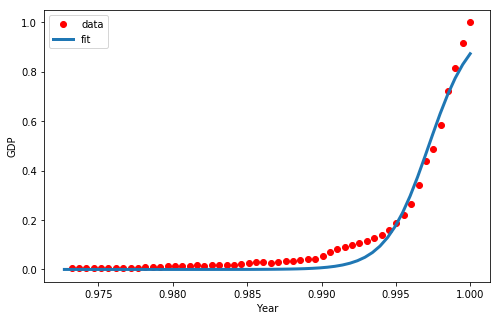

In [59]:
# plot resulting regression model
x = np.linspace(1960, 2015, 55)
x = x / max(x)

plt.figure(figsize = (8, 5))

y = sigmoid(x, *popt)

plt.plot(xdata, ydata, 'ro', label = 'data')
plt.plot(x, y, linewidth = 3.0, label='fit')
plt.legend(loc = 'best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [64]:
# calculate the accuracy of model
# split data into train/test
msk = np.random.rand(len(df_china)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# building the model using training set
popt, pcov = curve_fit(sigmoid, train_x, train_y)

# predict using test set
y_hat = sigmoid(test_x, *popt)

# evaluation
print('Mean absolute error: %.2f' % np.mean(np.absolute(y_hat - test_y)))
print('Residual sum of squares: %.2f' % np.mean((y_hat - test_y) **2 ))

from sklearn.metrics import r2_score
print('R2-score: %.2f' % r2_score(y_hat, test_y))

Mean absolute error: 0.02
Residual sum of squares: 0.00
R2-score: 0.98
